# Loading Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [2]:
original_x = pd.read_csv("./data/train_x.csv", delimiter=",", header = None) # load from text 

In [3]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)

In [4]:
original_x = original_x.values

In [5]:
y = (y.values).ravel()

In [7]:
original_x = original_x.astype(np.float32)

In [8]:
#normalize (don't know if I should do this)
original_x /= 255

In [ ]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

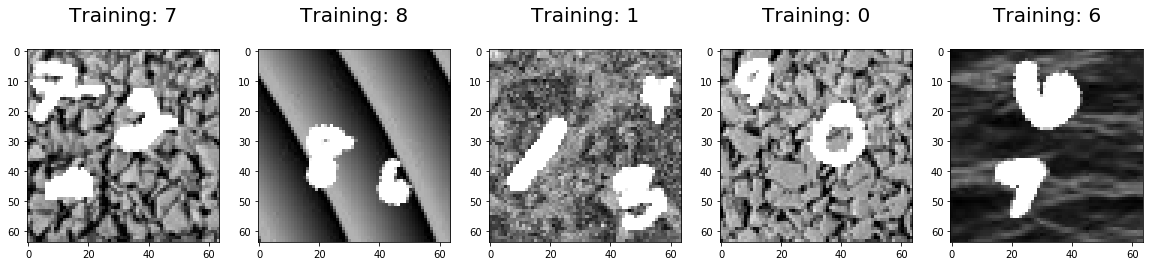

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(original_x[4940:4945], y[4940:4945])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

# Logisitc Regression - no preprocessing

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_x, train_y)

#predict on validation
predictions = logisticRegr.predict(valid_x)

score = logisticRegr.score(valid_x, valid_y)
print(score)

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
#visualizing misclassified instances

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)

### Processing the data

In [ ]:
def binarize_element(x, threshold = 200):
    #make this less than to get black digits and white background
    if x > threshold:
        x = 255
        return x
    else:
        x = 0
        return x

In [ ]:
def array_map(x):
    return map(binarize_element, x)

In [ ]:
new_x = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(new_x)):
    new_x[i] = list(array_map(x[i]))

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
import pandas as pd 
df = pd.DataFrame(new_x)

In [ ]:
df.to_csv("./data/bw_x.csv", header = False, index = False)

# Writing black & white data to file, going to do more preprocessing

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [ ]:
x = pd.read_csv("./data/bw_x.csv", delimiter=",", header = None) # load from processed images

In [ ]:
x = x.values

In [ ]:
x = x.astype(np.float32)

In [ ]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[4940:4945], y[4940:4945])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

## Getting the largest digit in area from images

In [ ]:
import cv2
from skimage import measure

In [ ]:
new_x = np.zeros((x.shape[0], x.shape[1]))

In [ ]:
for i in range(len(x)):
    thresh = np.reshape(x[i], (64,64))

    #get rid of small white bits that aren't part of digits
    #thresh = cv2.erode(im, None, iterations=1)
    #thresh = cv2.dilate(thresh, None, iterations=1)
    
    # perform a connected component analysis on the thresholded
    # image, then initialize a mask to store only the "large"
    # components
    labels = measure.label(thresh, neighbors=8, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    masks = {}

    # loop over the unique components
    for label in np.unique(labels):
        # if this is the background label, ignore it
        if label == 0:
            continue

        # otherwise, construct the label mask and count the
        # number of pixels 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        masks[numPixels] = labelMask

    try:
        mask = cv2.add(mask, masks[max(masks, key = int)])
        foo = mask.reshape(4096)
        new_x[i] = foo
    except:
        new_x[i] = x[i]

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(original_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[4140:4145], y[4140:4145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[4240:4245], y[4240:4245])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
def invert_element(x):
    #make this less than to get black digits and white background
    if x == 0:
        x = 255
        return x
    else:
        x = 0
        return x

In [ ]:
def invert_map(x):
    return map(invert_element, x)

In [ ]:
processed_x = np.zeros((new_x.shape[0],new_x.shape[1]))
for i in range(len(processed_x)):
    processed_x[i] = list(invert_map(new_x[i]))

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(processed_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
import pandas as pd 
df = pd.DataFrame(processed_x)

In [ ]:
df.to_csv("./data/processed_x.csv", header = False, index = False)

# Can start from here

In [10]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None) # load from processed images

In [11]:
x = x.values

In [ ]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

In [12]:
x = x.astype(np.float32)
x /= 255

In [13]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [16]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
np.random.seed(100)
from sklearn.model_selection import train_test_split
og_train_x, og_valid_x, og_train_y, og_valid_y = train_test_split(
    original_x, y, test_size=1/10.0, random_state=0)

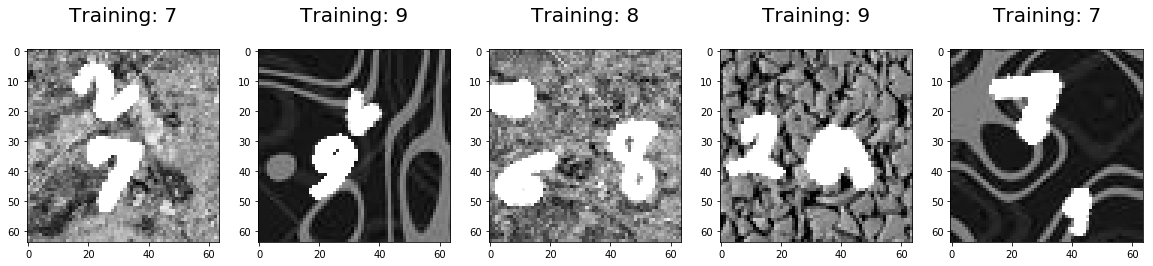

In [17]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(og_train_x[0:5], og_train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

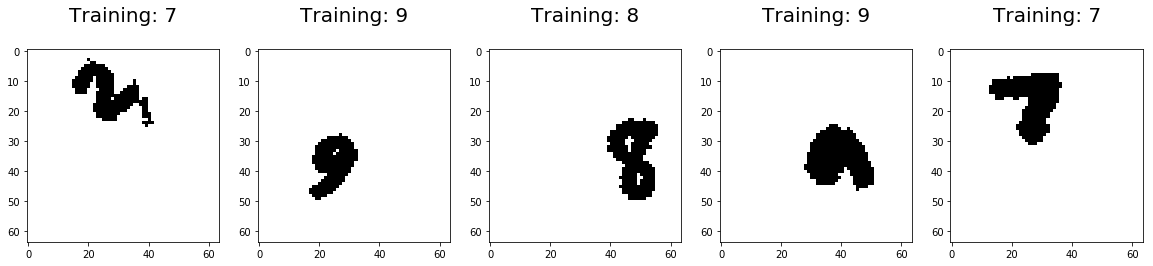

In [15]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

## Logistic Regression with Processed Data

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs')

In [19]:
clf.fit(og_train_x, og_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
#predict on validation
og_predictions = clf.predict(og_valid_x)

og_score = clf.score(og_valid_x, og_valid_y)
print(og_score)

0.1404


In [23]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_x, train_y)

In [ ]:
score = logisticRegr.score(valid_x, valid_y)
print(score)

In [ ]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)